<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_omc_integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import array

Function

In [0]:
def h(x):
  if x>0 and x<=0.01:
    return 100
  elif x>0.01 and x<1:
    return 1

Implement Pseudocode for omc integral(n):

In [0]:
def omc_integral(n):
  arr = array.array('i', [])
  
  for i in range(0,n):
    #drawing random points uniform between 0 and 1
    Y = np.random.uniform(low=0, high=1)
    #computing Xi=h(Yi) and appending
    X = h(Y)
    arr.append(X)
  #conputing the average
  return np.mean(arr)
    

Demonstrate convergence rate numerically

In [0]:
def omc_int_conv(N,m):
  arr = array.array('f',[])
  
  for i in range(0,m):
    a = omc_integral(N)
    arr.append(a)
  return arr

array('i', [5, 6, 7, 8, 9, 10])
array('f', [1.8134760856628418, 1.2996512651443481, 0.878592312335968, 0.5901865363121033, 0.43998926877975464, 0.29473674297332764])


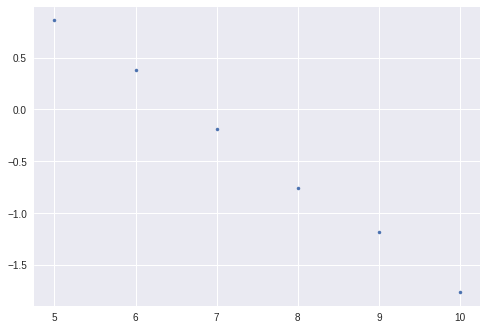

In [5]:
a1 = omc_int_conv(2**5,100)
s1 = np.std(a1)
a2 = omc_int_conv(2**6,100)
s2 = np.std(a2)
a3 = omc_int_conv(2**7,100)
s3 = np.std(a3)
a4 = omc_int_conv(2**8,100)
s4 = np.std(a4)
a5 = omc_int_conv(2**9,100)
s5 = np.std(a5)
a6 = omc_int_conv(2**10,100)
s6 = np.std(a6)
arrlogN = array.array('i', [5, 6, 7, 8, 9, 10])
arr_err = array.array('f', [s1,s2,s3,s4,s5,s6])
print(arrlogN)
print(arr_err)
plt.plot(arrlogN,np.log2(arr_err),'.') 

In [6]:
out = ss.linregress(arrlogN,np.log2(arr_err))
print('----->>>the convergence rate is ' + str(-out[0]))

----->>>the convergence rate is 0.5248020074197224


Find its convergence rate by computing RMSE

In [0]:
def rmse(arr):
  arr_sqerr = array.array('f',[])
  for i in range(len(arr)):
    sq_err = (arr[i]-1.99)**2# for each element in arr_mc, return the sqr of error
    arr_sqerr.append(sq_err)
  return np.sqrt(np.mean(arr_sqerr))# return the sqrt of the mean of all error

array('f', [1.839676022529602, 1.3041541576385498, 0.8807684183120728, 0.5912119150161743, 0.4399934709072113, 0.2976541221141815])


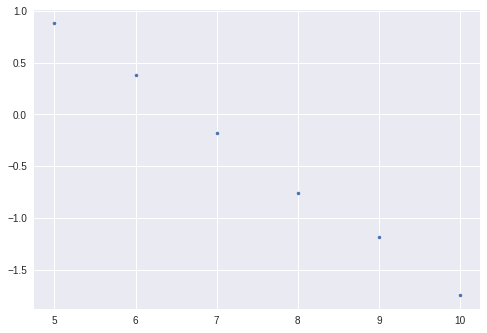

In [8]:
arr_rmse = array.array('f', [rmse(a1),
                            rmse(a2),
                            rmse(a3),
                            rmse(a4),
                            rmse(a5),
                            rmse(a6)])
print(arr_rmse)
plt.plot(arrlogN,np.log2(arr_rmse),'.')

In [9]:
out = ss.linregress(arrlogN,np.log2(arr_rmse))
print('----->>>the convergence rate is ' + str(-out[0]))

----->>>the convergence rate is 0.5261852379356112
